Lets check the sesonal aspect of webusers data set from monthly perspective. This data set contains the number of unique customers who logged in to their accounts on a website. The user_numbers column shows this count. Data is coming from https://www.kaggle.com/datasets/bertiemackie/daily-website-users.

In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import statsmodels as sm
from statsmodels.tsa.arima.model import ARIMA
import datetime

# ACF and PACF functions to test for autocorrelation
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
webusers_df = pd.read_csv("C:\\Users\\karol\\Downloads\\archive (3)\\users.csv", header = 0,
                     names = ['date', 'measure','user_numbers'],
                     index_col = 0)

In [3]:
webusers_df.head()

,date,measure,user_numbers
0,2019-01-01,daily_users,67
1,2019-01-02,daily_users,51
2,2019-01-03,daily_users,58
3,2019-01-04,daily_users,71
4,2019-01-05,daily_users,28


In [4]:
webusers_df['date'] = pd.to_datetime(webusers_df['date'])   

In [5]:
# add any other features that are needed
#select the month and day of the year
webusers_df['year']=webusers_df['date'].dt.year
webusers_df['month'] = webusers_df['date'].dt.strftime('%Y-%m')
webusers_df['day'] = webusers_df['date'].dt.day
    
# remove 2022 value
webusers_df = webusers_df[webusers_df['month'] != '2022-01']


In [6]:
webusers_df.head()

,date,measure,user_numbers,year,month,day
0,2019-01-01,daily_users,67,2019,2019-01,1
1,2019-01-02,daily_users,51,2019,2019-01,2
2,2019-01-03,daily_users,58,2019,2019-01,3
3,2019-01-04,daily_users,71,2019,2019-01,4
4,2019-01-05,daily_users,28,2019,2019-01,5


In [7]:
webusers_df=webusers_df[['user_numbers','month']]

In [8]:
webusers_df.head()

,user_numbers,month
0,67,2019-01
1,51,2019-01
2,58,2019-01
3,71,2019-01
4,28,2019-01


In [9]:
webusers_df= webusers_df.groupby(webusers_df['month'])

In [10]:
webusers_df.sum()

,user_numbers
month,
2019-01,1715
2019-02,1502
2019-03,1644
2019-04,1684
2019-05,1657
2019-06,1579
2019-07,1756
2019-08,1699
2019-09,1618


In [11]:
webusers_df=DataFrame(webusers_df.sum())

In [12]:
webusers_df = webusers_df.reset_index()

In [13]:
webusers_df.head()

,month,user_numbers
0,2019-01,1715
1,2019-02,1502
2,2019-03,1644
3,2019-04,1684
4,2019-05,1657


In [14]:
#checking the missing values per column

missing_values=pd.DataFrame(webusers_df.isnull().any(),columns=(['Nulls']))
missing_values['Nan_count']=pd.DataFrame(webusers_df.isnull().sum())
missing_values['Nan_percentage']=round((webusers_df.isnull().mean()*100),2)
print(missing_values.sort_values(by='Nan_percentage',ascending=False))

              Nulls  Nan_count  Nan_percentage
month         False          0             0.0
user_numbers  False          0             0.0


In [15]:
# Pandas Series object with time stamp (monthly frequency)
webusersts = pd.Series(webusers_df['user_numbers'].values,
                     index = pd.date_range('2019-01-31',
                                           periods = 36 ,
                                           freq = 'M'))

In [16]:
webusersts.head()

2019-01-31    1715
2019-02-28    1502
2019-03-31    1644
2019-04-30    1684
2019-05-31    1657
Freq: M, dtype: int64

In [17]:
# Month plot
from statsmodels.graphics.tsaplots import month_plot

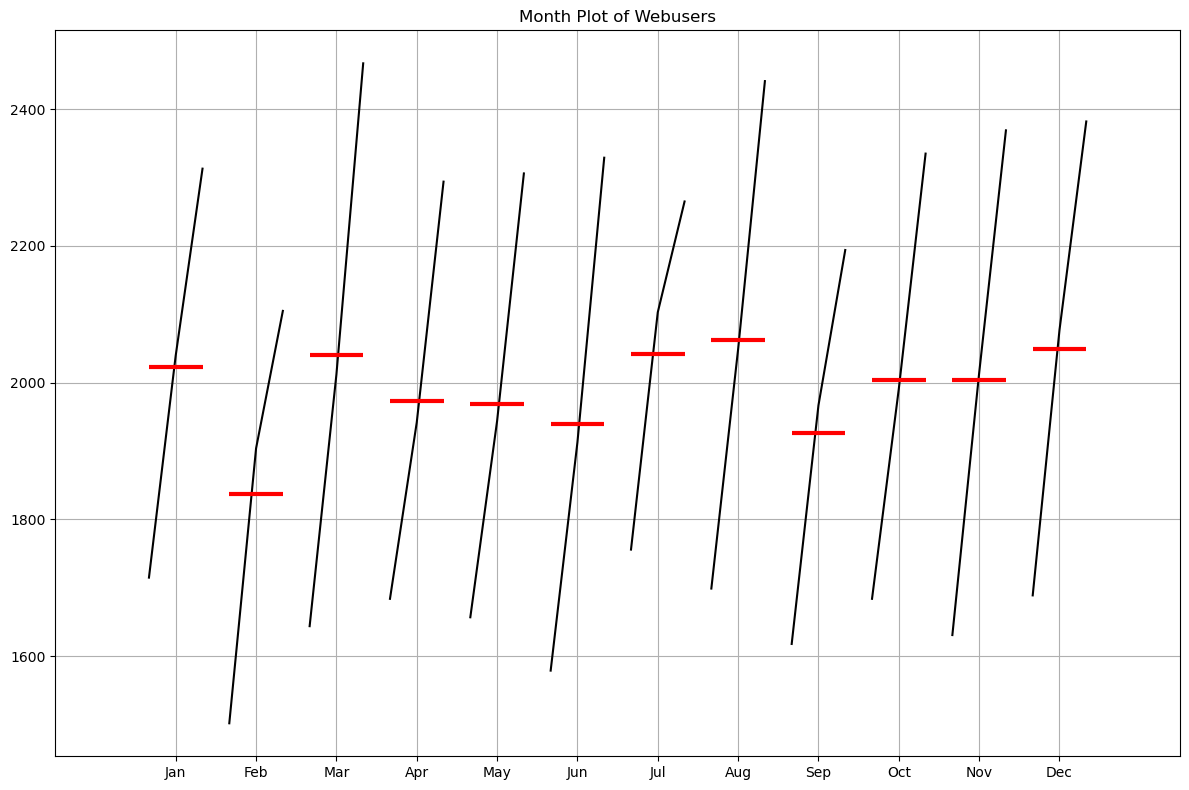

In [18]:
# Month_plot() requires the data to have a monthly (12 or 'M') frequency
fig, ax1 = plt.subplots(1, 1, figsize = (12,8))
month_plot(webusersts, ax = ax1)
plt.title("Month Plot of Webusers")
plt.grid(axis = 'both')
plt.tight_layout()

In [19]:
webusers_df['month'] = pd.to_datetime(webusers_df['month'], utc=True)

In [20]:
# Season plot
# Restructuring of webusers_df by pandas pivot_table
pivot_df = pd.pivot_table(webusers_df,index = pd.date_range('2019-01-31',
                                           periods = 36 ,
                                           freq = 'M' ),
                          columns = webusers_df['month'].dt.year,
                          values = 'user_numbers')
pivot_df

month,2019,2020,2021
2019-01-31,1715.0,NaN,NaN
2019-02-28,1502.0,NaN,NaN
2019-03-31,1644.0,NaN,NaN
2019-04-30,1684.0,NaN,NaN
2019-05-31,1657.0,NaN,NaN
2019-06-30,1579.0,NaN,NaN
2019-07-31,1756.0,NaN,NaN
2019-08-31,1699.0,NaN,NaN
2019-09-30,1618.0,NaN,NaN
2019-10-31,1684.0,NaN,NaN


In [21]:
# Add a new index to the pivot table
month_names = ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec','Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec','Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
pivot_df.index = month_names
pivot_df

month,2019,2020,2021
Jan,1715.0,NaN,NaN
Feb,1502.0,NaN,NaN
Mar,1644.0,NaN,NaN
Apr,1684.0,NaN,NaN
May,1657.0,NaN,NaN
Jun,1579.0,NaN,NaN
Jul,1756.0,NaN,NaN
Aug,1699.0,NaN,NaN
Sep,1618.0,NaN,NaN
Oct,1684.0,NaN,NaN


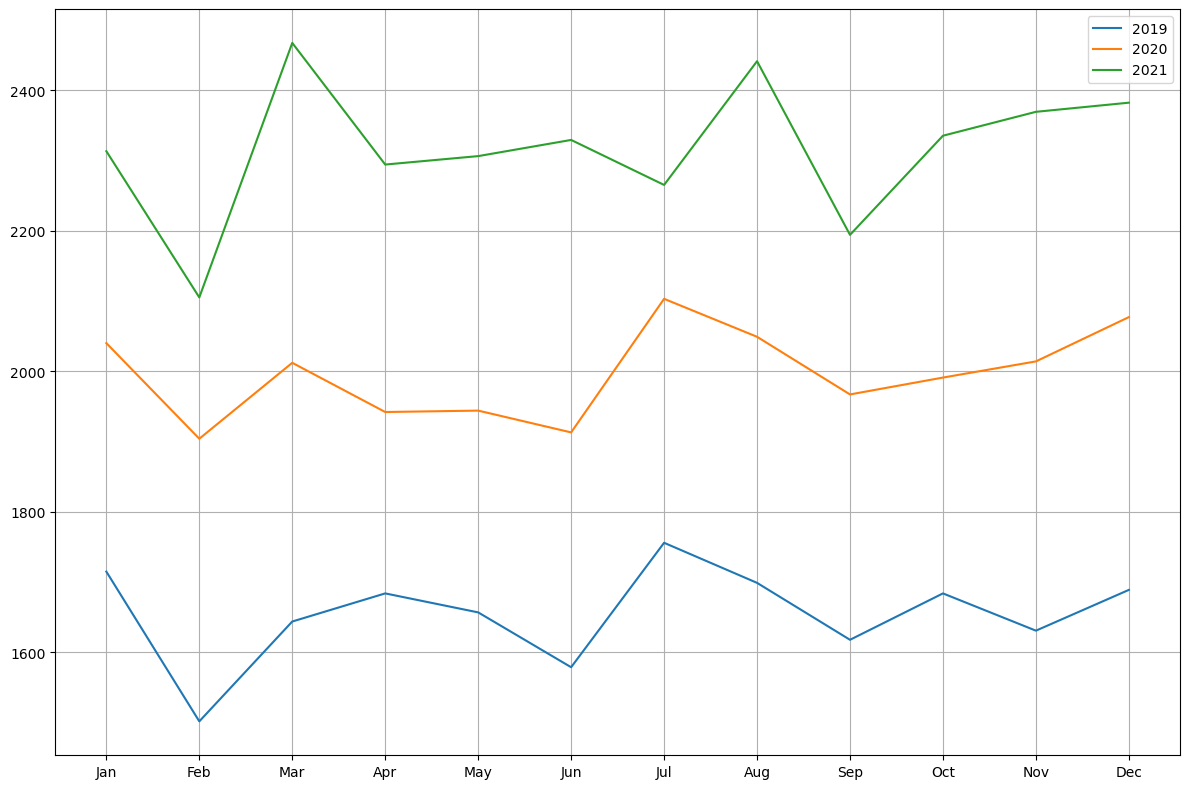

In [22]:
# Creating the season plot
plt.figure(figsize=(12,8))
plt.plot(pivot_df)
plt.grid(axis = 'both')
plt.legend(pivot_df.columns)
plt.tight_layout()

We can assume presence of monthly seasonality in the data based on graph above.

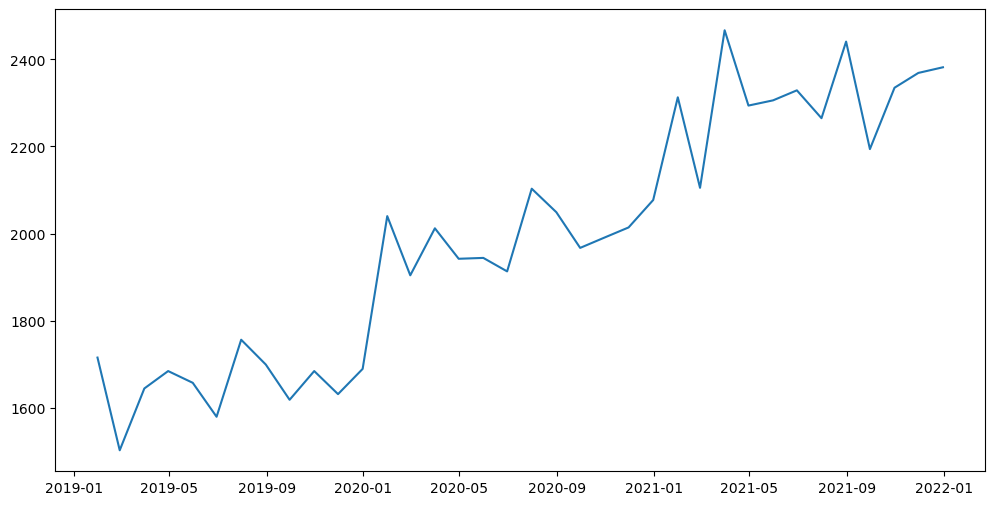

In [23]:
# Additive or multiplicative decomposition
plt.figure(figsize=(12,6))
plt.plot(webusersts)

In [24]:
# Seasonal Decomposition
# Simple seasonal decomposition with statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

In [25]:
webusers_decomposed = seasonal_decompose(webusersts)

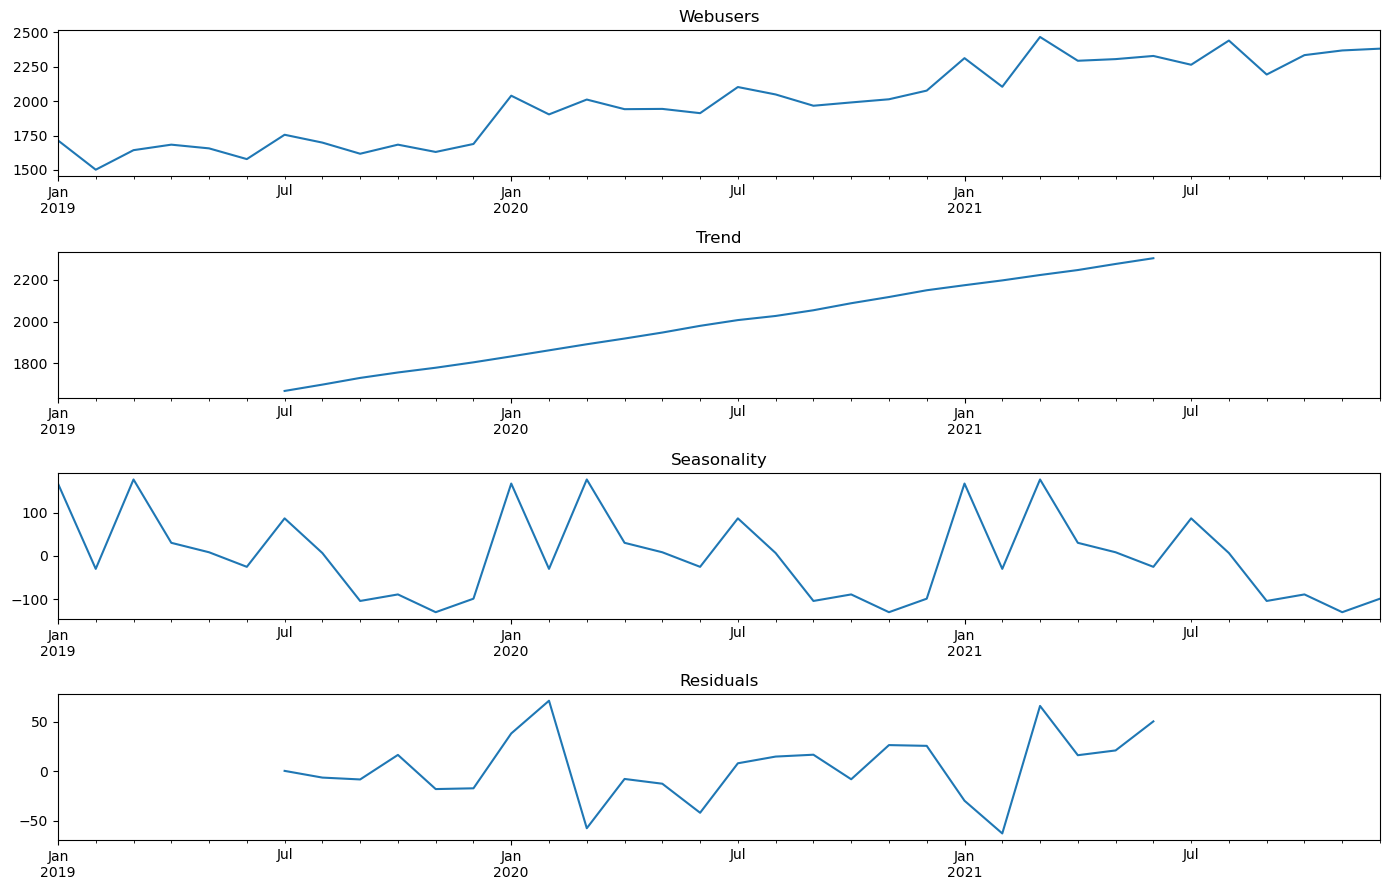

In [26]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize = (14,9))
webusersts.plot(ax = ax1)
webusers_decomposed.trend.plot(ax = ax2)
webusers_decomposed.seasonal.plot(ax = ax3)
webusers_decomposed.resid.plot(ax = ax4)
ax1.set_title("Webusers")
ax2.set_title("Trend")
ax3.set_title("Seasonality")
ax4.set_title("Residuals")
plt.tight_layout()

<Axes: >

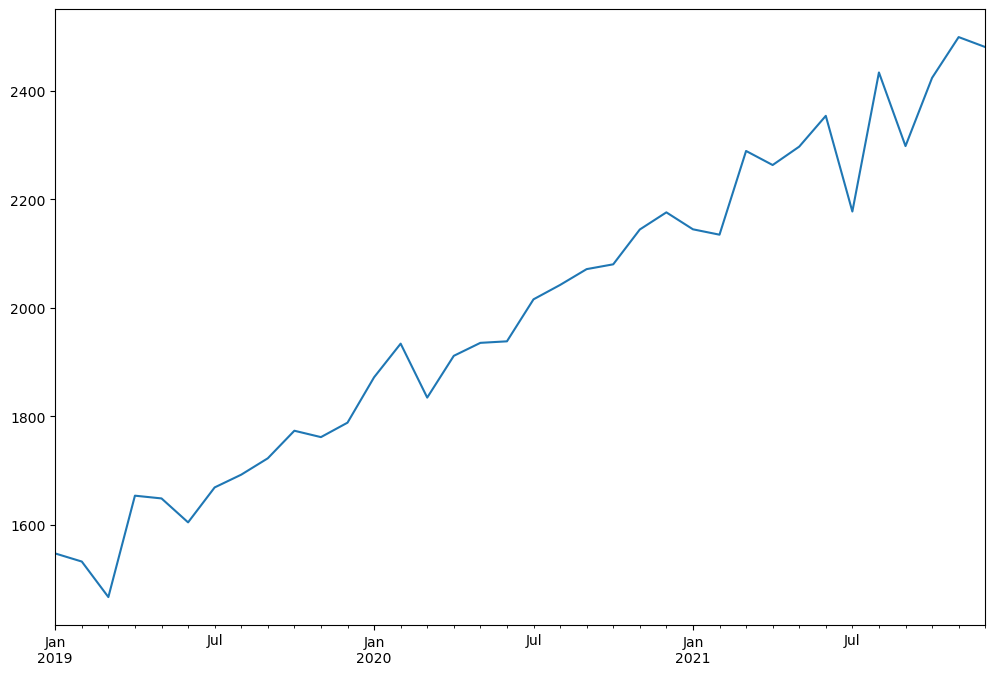

In [27]:
# Eliminating the seasonal component
webusers_adjusted = webusersts - webusers_decomposed.seasonal
plt.figure(figsize=(12,8))
webusers_adjusted.plot()

<Axes: >

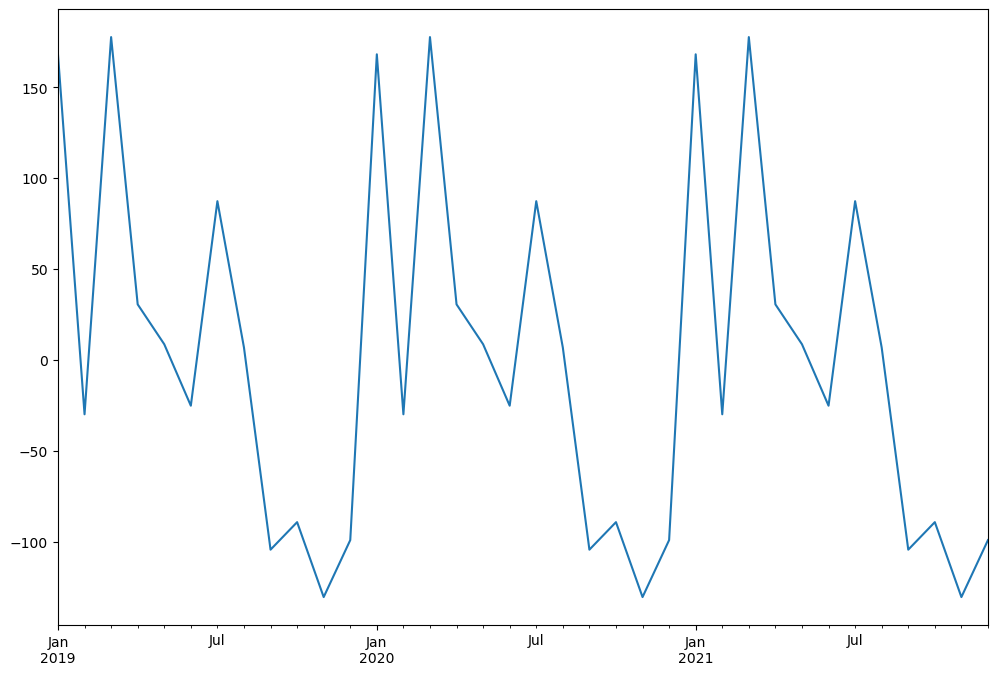

In [28]:
# Getting the seasonal component only
# Seasonality gives structure to the data
plt.figure(figsize=(12,8))
webusers_decomposed.seasonal.plot()

For webusers_adjusted we will try to check stationarity and autocorrelation with ACF and PACF graphs

In [29]:
#Chcecking the stationarity of Time series
# Custom stationarity test function
def stationarity_test(timeseries):
    """"Augmented Dickey-Fuller Test
    Test for Stationarity"""
    import pandas as pd
    from statsmodels.tsa.stattools import adfuller
    print("Results of Dickey-Fuller Test:")
    df_test = adfuller(timeseries, autolag = "AIC")
    df_output = pd.Series(df_test[0:4],
                          index = ["Test Statistic", "p-value", "Number of Lags Used",
                                   "Number of Observations Used"])
    print(df_output)

In [30]:
stationarity_test(webusers_adjusted)

Results of Dickey-Fuller Test:
Test Statistic                 -0.570875
p-value                         0.877428
Number of Lags Used             8.000000
Number of Observations Used    27.000000
dtype: float64


Dataset is not stationary, the p-value is more then 0.05 

Lets use Differencing, a popular method used to get rid of seasonality and trends. This is done by subtracting the current observation with the previous observation.

In [31]:
webusersts_diff = webusers_adjusted.diff().diff(6).dropna()

In [32]:
webusersts_diff.head()

2019-08-31     38.458333
2019-09-30     95.750000
2019-10-31   -136.208333
2019-11-30     -6.708333
2019-12-31     70.833333
Freq: M, dtype: float64

In [33]:
stationarity_test(webusersts_diff)

Results of Dickey-Fuller Test:
Test Statistic                -7.935977e+00
p-value                        3.412824e-12
Number of Lags Used            1.000000e+00
Number of Observations Used    2.700000e+01
dtype: float64


The p-value is less then 0.05 

In [ ]:
#The ACF and PACF plots

C:\Users\karol\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


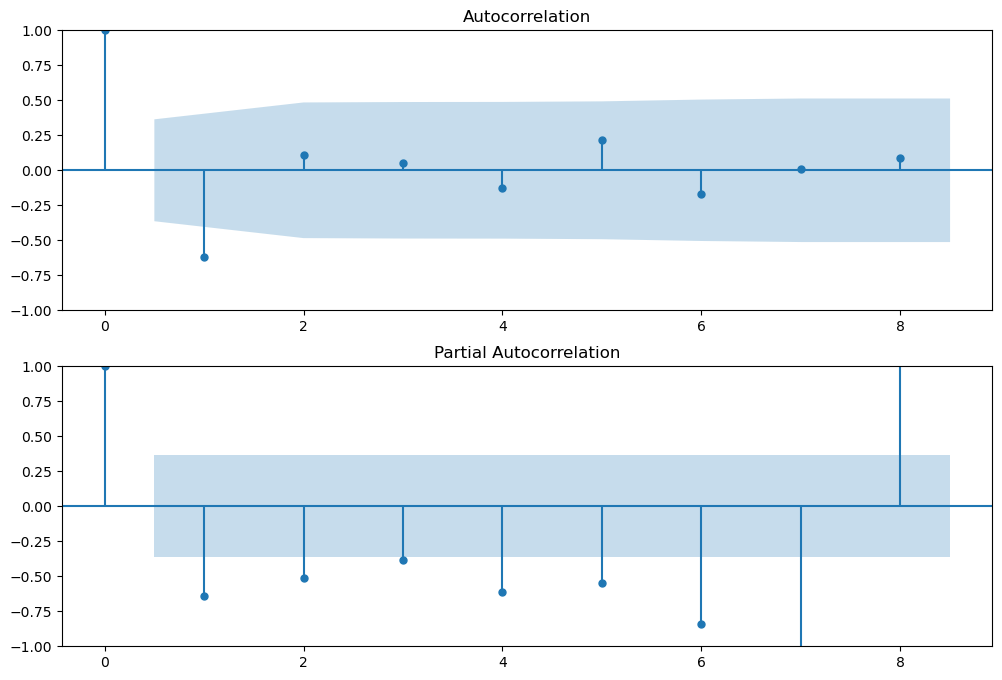

In [34]:
# ACF and PACF plots
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(webusersts_diff, lags=8, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(webusersts_diff, lags=8, ax=ax2)

Forecast for model webusers_diff. Model where we eliminate sesonal component and did differencing.

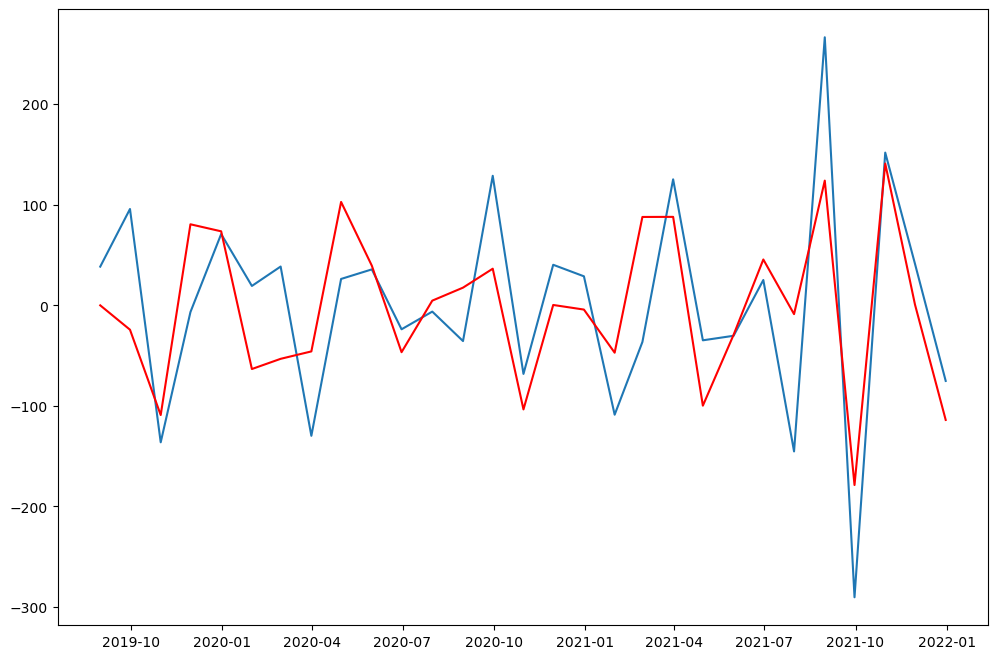

In [35]:
# ARIMA model (2,0,0) setup for webusersts_diff 
model = ARIMA(webusersts_diff, order=(2, 0, 0) )
results_AR200 = model.fit()
plt.figure(figsize=(12,8))
plt.plot(webusersts_diff)
plt.plot(results_AR200.fittedvalues, color='red')

Model is not perfectly fitted but is following the main pattern.

In [38]:
# ARIMA forecast
Fcast200 = results_AR200.predict(start = '2022-01-01',
                               end = '2023-04-30')

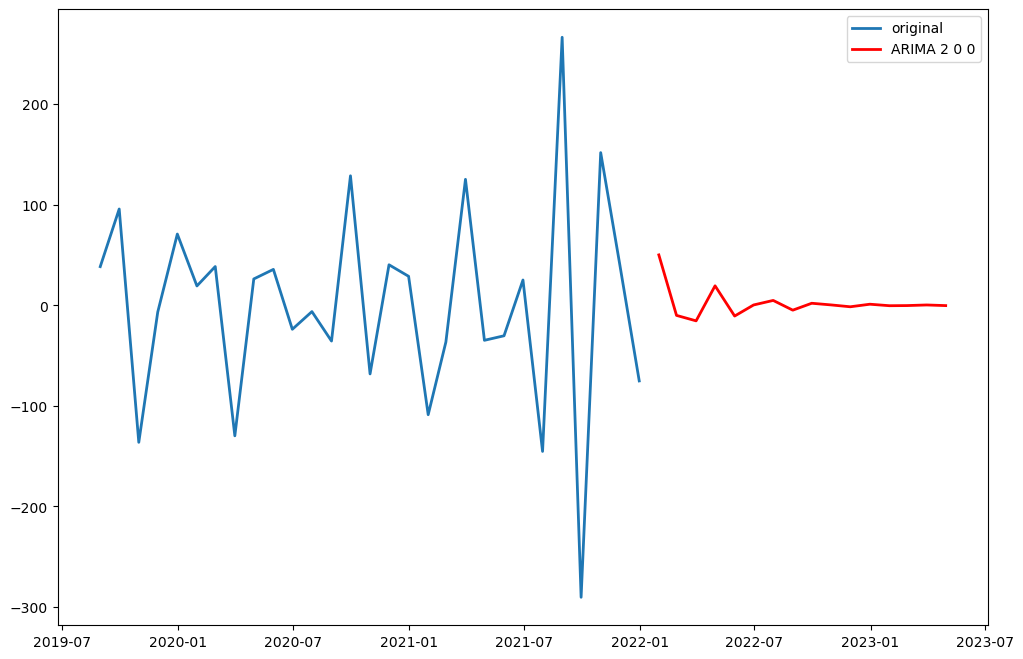

In [39]:
# Forecast comparison
plt.figure(figsize = (12, 8))
plt.plot(webusersts_diff, linewidth = 2, label = "original")
plt.plot(Fcast200, color='red', linewidth = 2,
         label = "ARIMA 2 0 0")
plt.legend()

Model diagnostic on the residuals ( Residuals=orginal data-fitted values)
To have a good model the residuals should have normal distribution, mean close to zero,autocorrelation(ACF and PACF plots)

In [40]:
webusersts_diff.tail()

2021-08-31    266.458333
2021-09-30   -290.250000
2021-10-31    151.791667
2021-11-30     41.291667
2021-12-31    -75.166667
Freq: M, dtype: float64

In [41]:
results_AR200.fittedvalues.tail()

2021-08-31    123.942891
2021-09-30   -178.658082
2021-10-31    140.896836
2021-11-30      0.772787
2021-12-31   -113.939436
Freq: M, dtype: float64

In [42]:
results_AR200.resid.tail()

2021-08-31    142.515443
2021-09-30   -111.591918
2021-10-31     10.894831
2021-11-30     40.518880
2021-12-31     38.772770
Freq: M, dtype: float64

In [43]:
# Original series - fitted values = model residuals
(webusersts_diff - results_AR200.fittedvalues).tail()

2021-08-31    142.515443
2021-09-30   -111.591918
2021-10-31     10.894831
2021-11-30     40.518880
2021-12-31     38.772770
Freq: M, dtype: float64

In [44]:
# Residuals are close to a zero mean
np.mean(results_AR200.resid)

3.1239937987051998

Mean is far away from zero.

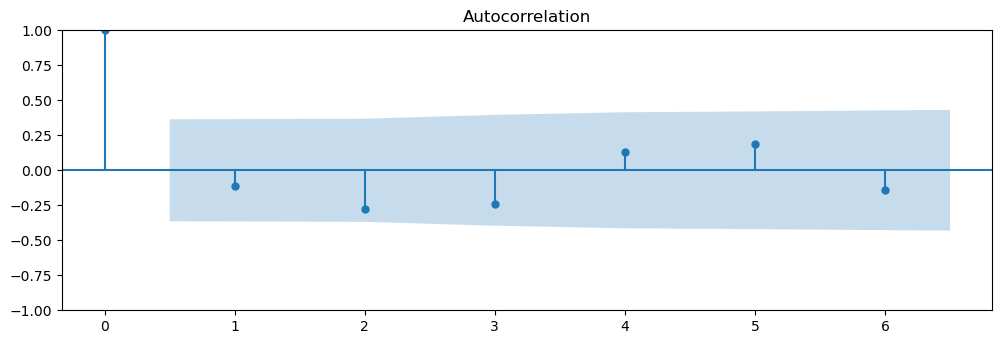

In [45]:
# ACF plot to test for autocorrelation in the residuals
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(results_AR200.resid, lags=6, ax=ax1)

C:\Users\karol\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


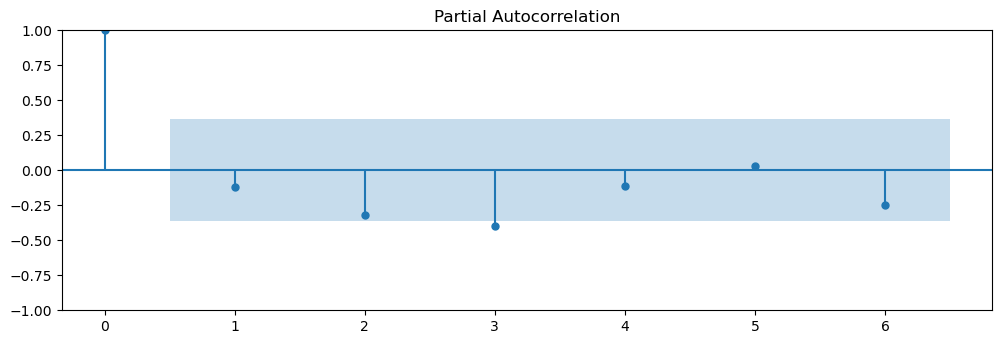

In [46]:
fig = plt.figure(figsize=(12,8))
ax2=fig.add_subplot(212)
fig=plot_pacf(results_AR200.resid, lags=6, ax=ax2)

ACF and PACF plots looks fine. No autocorrelation present.

In [47]:
# Custom function to test for a normal distribution
def resid_histogram(data):
    import matplotlib.pyplot as plt
    from numpy import linspace
    from scipy.stats import norm

    plt.figure(figsize=(10,6))
    plt.hist(data, bins = 'auto', density = True, rwidth = 0.85,
             label = 'Residuals')
    mean_resid, std_resid = norm.fit(data)
    xmin, xmax = plt.xlim()
    curve_length = linspace(xmin, xmax, 100)
    bell_curve = norm.pdf(curve_length, mean_resid, std_resid)
    plt.plot(curve_length, bell_curve, 'm', linewidth = 2)
    plt.grid(axis='y', alpha = 0.2)
    plt.xlabel('Residuals')
    plt.ylabel('Density')
    plt.title('Residuals vs Normal Distribution - Mean = '+str(round(mean_resid,2))+', Std = '+str(round(std_resid,2)))
    plt.show()

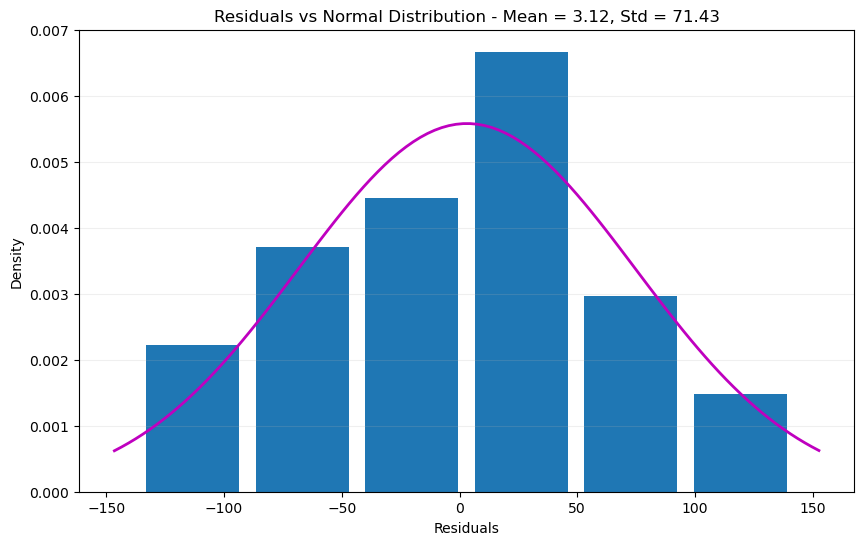

In [48]:
resid_histogram(results_AR200.resid)

It is close to normal distribution.

In [49]:
results_AR200.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   29
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -165.073
Date:                Mon, 20 May 2024   AIC                            338.145
Time:                        21:58:25   BIC                            343.614
Sample:                    08-31-2019   HQIC                           339.858
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0395      5.665     -0.007      0.994     -11.142      11.063
ar.L1         -0.9396      0.166     -5.656      0.000      -1.265      -0.614
ar.L2         -0.4944      0.269     -1.841      0.066      -1.021       0.032
sigma2      4963.0154   1716.093      2.892      0.004    1599.535    8326.495
===================================================================================
Ljung-Box (L1) (Q):                   0.52   Jarque-Bera (JB):                 0.73
Prob(Q):                              0.47   Prob(JB):                         0.69
Heteroskedasticity (H):               1.26   Skew:                            -0.21
Prob(H) (two-sided):                  0.72   Kurtosis:                         2.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Lets try forecast for model webusers_adjusted when the data is not stationary but we eliminate sesonal component.

C:\Users\karol\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


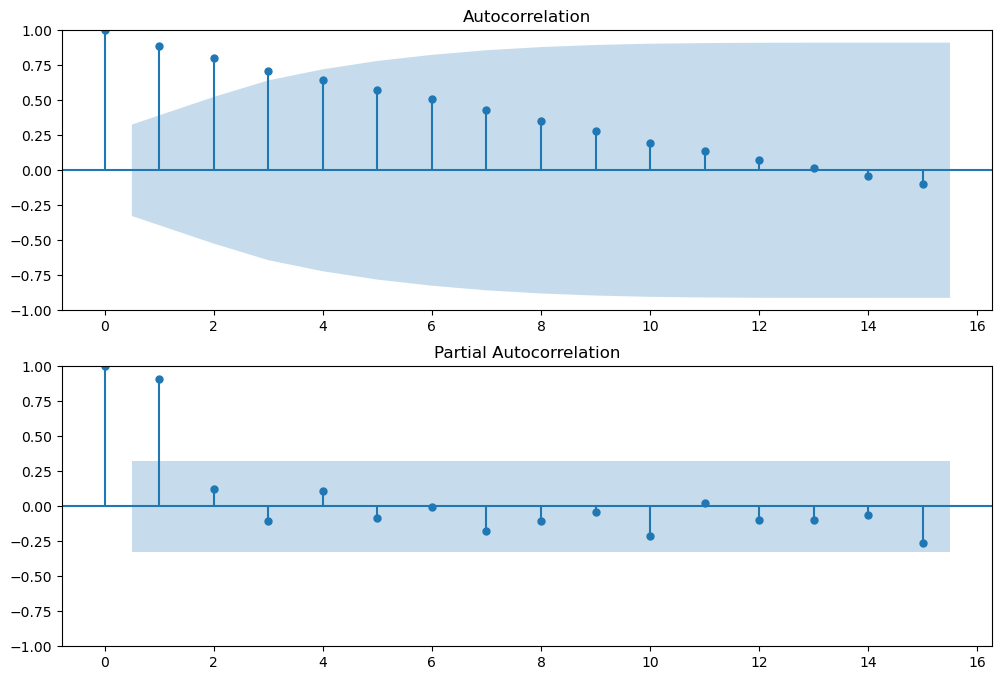

In [50]:
# ACF and PACF plots
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(webusers_adjusted, lags=15, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(webusers_adjusted, lags=15, ax=ax2)

C:\Users\karol\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


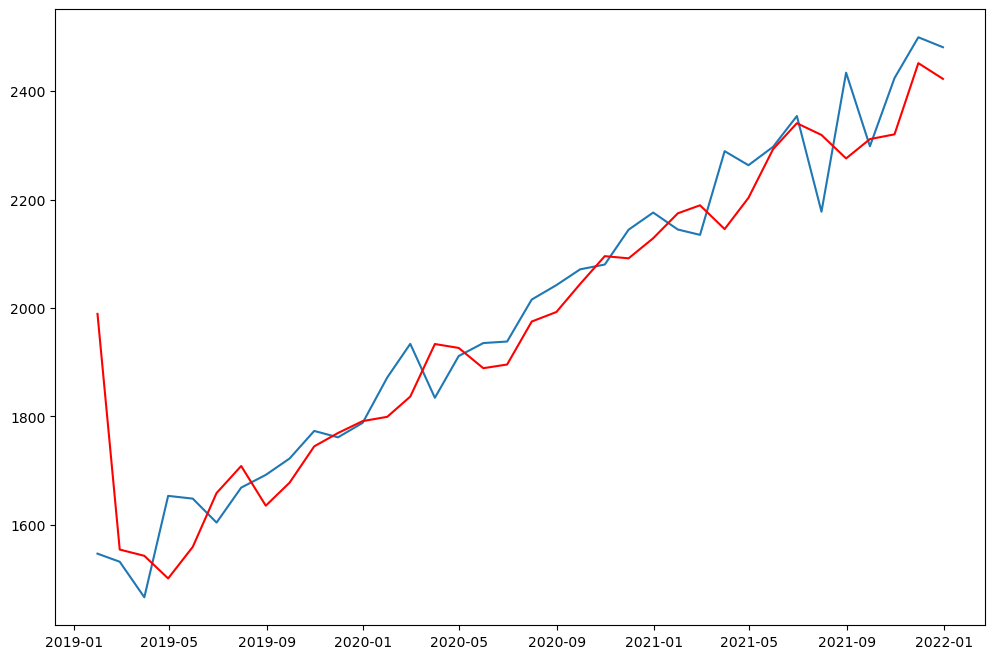

In [51]:
# ARIMA model setup
model = ARIMA(webusers_adjusted, order=(4, 0, 0) )
results_AR400 = model.fit()
plt.figure(figsize=(12,8))
plt.plot(webusers_adjusted)
plt.plot(results_AR400.fittedvalues, color='red')

In [52]:
# ARIMA forecast
Fcast400 = results_AR400.predict(start = '2022-01-01',
                               end = '2023-04-30')

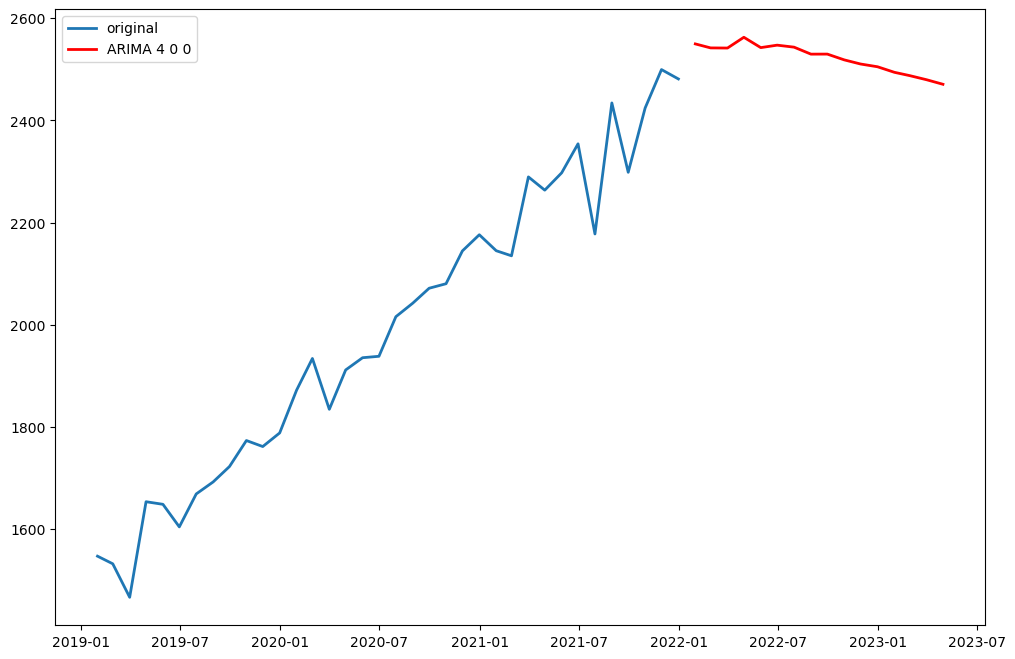

In [53]:
# Forecast comparison
plt.figure(figsize = (12, 8))
plt.plot(webusers_adjusted, linewidth = 2, label = "original")
plt.plot(Fcast400, color='red', linewidth = 2,
         label = "ARIMA 4 0 0")
plt.legend()

In [ ]:
#Model diagnostic on the residuals ( Residuals=orginal data-fitted values)
#To have a good model the residuals should have normal distribution, mean close to zero,autocorrelation(ACF and PACF plots)

In [54]:
webusers_adjusted.tail()

2021-08-31    2434.250000
2021-09-30    2298.458333
2021-10-31    2424.312500
2021-11-30    2499.541667
2021-12-31    2481.187500
Freq: M, dtype: float64

In [55]:
results_AR400.fittedvalues.tail()

2021-08-31    2276.013017
2021-09-30    2311.682783
2021-10-31    2320.470955
2021-11-30    2451.818054
2021-12-31    2422.820787
Freq: M, dtype: float64

In [56]:
results_AR400.resid.tail()

2021-08-31    158.236983
2021-09-30    -13.224449
2021-10-31    103.841545
2021-11-30     47.723613
2021-12-31     58.366713
Freq: M, dtype: float64

In [57]:
# Original series - fitted values = model residuals
(webusers_adjusted - results_AR400.fittedvalues).tail()

2021-08-31    158.236983
2021-09-30    -13.224449
2021-10-31    103.841545
2021-11-30     47.723613
2021-12-31     58.366713
Freq: M, dtype: float64

In [58]:
# Residuals are close to a zero mean
np.mean(results_AR400.resid)

11.699348136529629

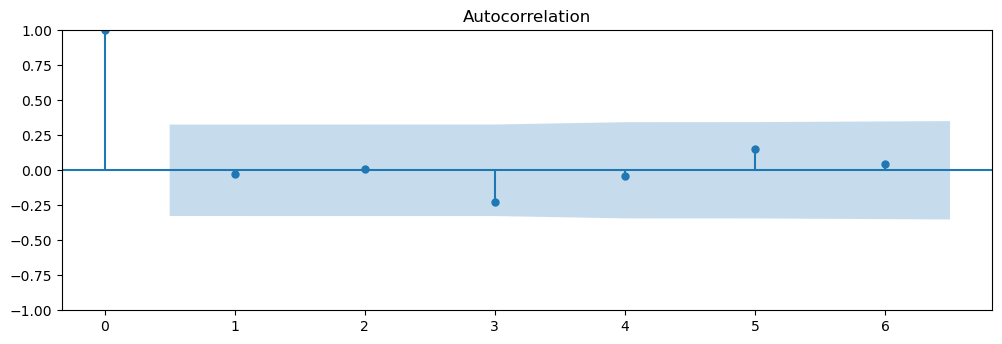

In [59]:
# ACF plot to test for autocorrelation in the residuals
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(results_AR400.resid, lags=6, ax=ax1)

C:\Users\karol\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


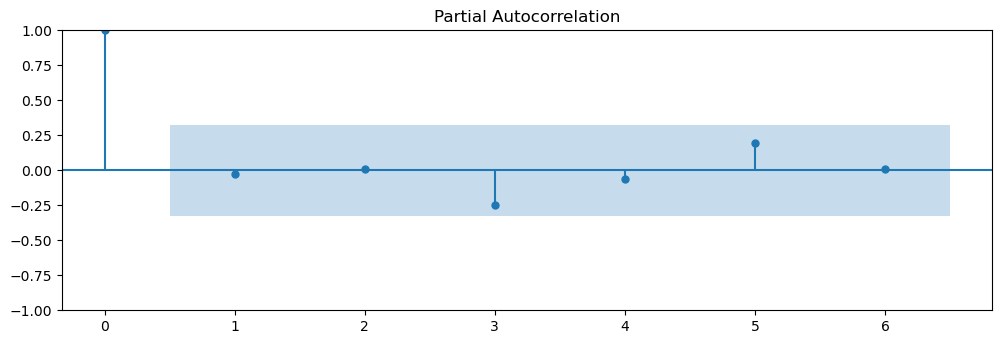

In [60]:
fig = plt.figure(figsize=(12,8))
ax2=fig.add_subplot(212)
fig=plot_pacf(results_AR400.resid, lags=6, ax=ax2)

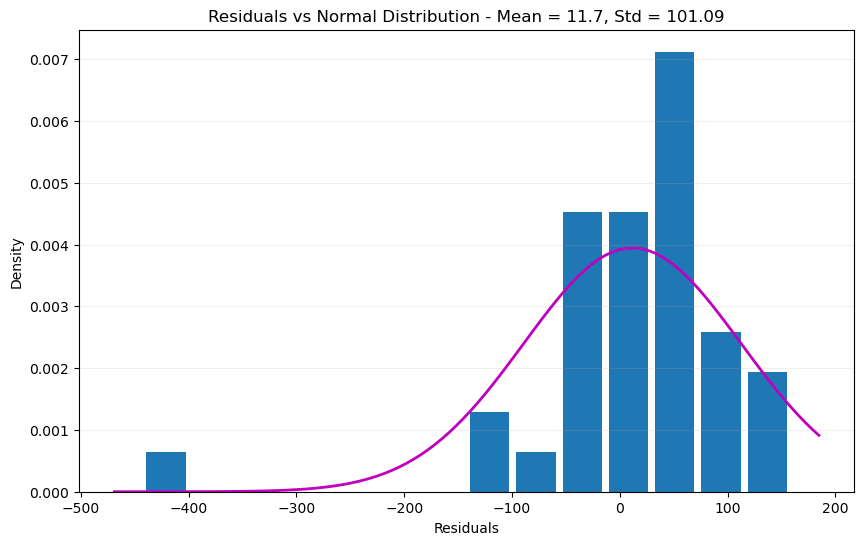

In [61]:
resid_histogram(results_AR400.resid)

It is far away from normal distribution.

In [62]:
results_AR400.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   36
Model:                 ARIMA(4, 0, 0)   Log Likelihood                -206.289
Date:                Mon, 20 May 2024   AIC                            424.578
Time:                        21:59:36   BIC                            434.079
Sample:                    01-31-2019   HQIC                           427.894
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1989.3025    488.712      4.070      0.000    1031.444    2947.161
ar.L1          0.5535      0.190      2.915      0.004       0.181       0.926
ar.L2          0.6035      0.216      2.792      0.005       0.180       1.027
ar.L3          0.2622      0.186      1.412      0.158      -0.102       0.626
ar.L4         -0.4327      0.258     -1.680      0.093      -0.937       0.072
sigma2      4884.2245   1693.698      2.884      0.004    1564.637    8203.812
===================================================================================
Ljung-Box (L1) (Q):                   1.11   Jarque-Bera (JB):                 0.16
Prob(Q):                              0.29   Prob(JB):                         0.92
Heteroskedasticity (H):               1.92   Skew:                            -0.15
Prob(H) (two-sided):                  0.27   Kurtosis:                         2.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Model Forecast for webusers_diff, where we eliminate sesonal component and did differencing is performing better however far away from good prediction.